In [40]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

print("project_dir: ", project_dir)
from utils.pipeline import Pipeline, EvaluationEnum

dataloader = Pipeline(evaluation=EvaluationEnum.LAST)



data, target = dataloader.get_econmical_classification_dataset_and_target()
vars2drop = ['Time', 'x1', 'x10', 'x14', 'x16', 'x19', 'x2', 'x23', 'x24', 'x25', 'x3', 'x30', 'x32', 'x35', 'x36', 'x40', 'x41', 'x43', 'x44', 'x46', 'x5', 'x59', 'x61', 'x63', 'x64', 'x68', 'x70', 'x73', 'x78', 'x8', 'x9']
data = data.drop(columns=vars2drop)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
project_dir:  /Users/hugojarudd/Desktop/kdd-process/src


In [41]:
from numpy import array, ndarray
from sklearn.model_selection import train_test_split
from pandas import DataFrame, Series, Index, Period

file_tag = target

eval_metric = "f1"

train, test = train_test_split(data, test_size=0.2, random_state=42)

labels: list = list(train[target].unique())
labels.sort()

trnY: array = train.pop(target).to_list()
trnX: ndarray = train.values

tstY: array = test.pop(target).to_list()
tstX: ndarray = test.values

Train#=5657 Test#=1415
Labels=[np.int64(0), np.int64(1)]
KNN best with k=1 and manhattan


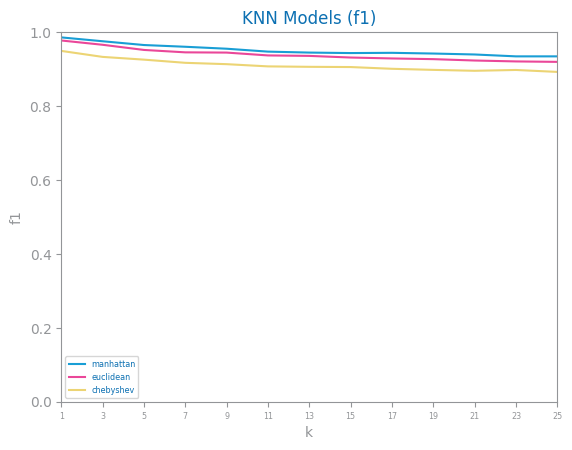

In [42]:
from typing import Literal
from numpy import array, ndarray
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multiline_chart
from dslabs_functions import read_train_test_from_files, plot_evaluation_results

def knn_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, k_max: int=19, lag: int=2, metric='accuracy'
        ) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']

    kvalues: list[int] = [i for i in range(1, k_max+1, lag)]
    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance: float = eval
                best_params['params'] = (k, d)
                best_model = clf
            # print(f'KNN {d} k={k}')
        values[d] = y_tst_values
    print(f'KNN best with k={best_params["params"][0]} and {best_params["params"][1]}')
    plot_multiline_chart(kvalues, values, title=f'KNN Models ({metric})', xlabel='k', ylabel=metric, percentage=True)

    return best_model, best_params

file_tag = 'stroke'
target = 'stroke'
eval_metric = 'f1'

print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

figure()
best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
#savefig(f'images/{file_tag}_knn_{eval_metric}_study.png')
show()

<Figure size 640x480 with 0 Axes>

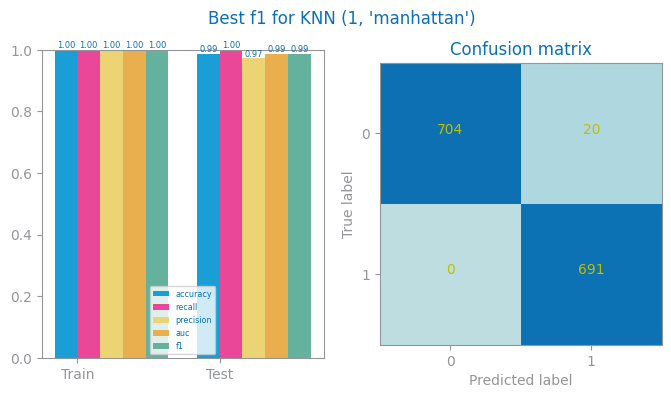

In [43]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
#savefig(f'images/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

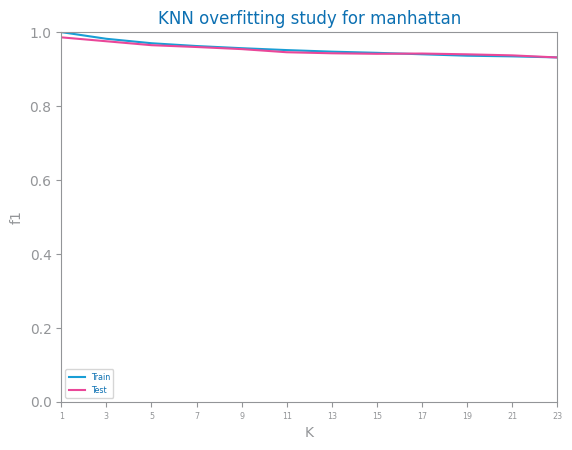

In [44]:
from matplotlib.pyplot import figure, savefig

distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
#savefig(f"images/{file_tag}_knn_overfitting.png")
show()

In [45]:
print(data.columns.values)

['Company' 'Time' 'Financial Distress' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x8'
 'x9' 'x10' 'x11' 'x12' 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21'
 'x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x35'
 'x36' 'x37' 'x39' 'x40' 'x41' 'x42' 'x43' 'x44' 'x45' 'x46' 'x47' 'x51'
 'x54' 'x55' 'x56' 'x57' 'x58' 'x59' 'x60' 'x61' 'x63' 'x64' 'x65' 'x66'
 'x67' 'x68' 'x69' 'x70' 'x71' 'x72' 'x73' 'x74' 'x78' 'x80' 'x82' 'x83'
 'CLASS']
